# Definición Series Temporales Fractales

Explicas loq ue es una serie temporal fractal [wiki], [ref2]

El concepto de fractal proviene del latín fractus (fractura), fue desarrollado por Benoît Mandelbort en 1975. Un fractal es un elemento semigeométrico infinito, es decir, en la escala que se observe siempre es igual, está formado por figuras más pequeñas con la misma distribución estadística.

Un fractal puede estar creado por la naturaleza, como es el caso de las hojas de los helechos, las caracolas o incluso los copos de nieve, o pueden ser creados por el hombre mediante representaciones artísticas. Los fractales pueden presentar tres tipos diferentes de autosimilitud. En primer lugar, la autosimilitud exacta, es decir, el elemento presenta la misma forma en cualquier escala. Por otro lado, la cuasiautosimilitud, en este caso la figura, a medida que la escala de observación varía, se parece pero no con exactitud. Por último, la autosimilitud estadística, el fractal presenta una dimensión estadística que es conservada con la variación de escala.

$$fdp\{x(t)\} \propto fdp\{x(tH)\}$$

[https://definicion.de/fractal/]

# Definición de exponente de Hurst
El exponente de Hurst fue estudiado por Harold Edwin Hurst, mide la independencia de las series temporales y sirve para diferenciar fractales y estimar la autocorrelación en una serie de datos. 

Mandelbort utilizó el estudio de Hurst para su análisis de rango reescalado (R/S):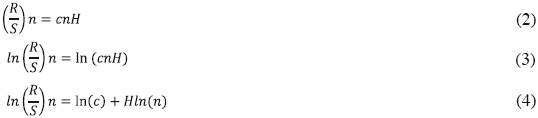

(R/S): es la notación utilizada para el estadístico rango reescalado. 
c: es una constante de proporcionalidad. 
n: es el número de datos por intervalo. 
H: es el coeficiente de Hurst.

Como se ha mencionado anteriormente las series de tiempo fractales se caracterizan por la invarianza temporal, a consecuencia de esto, Mandelbort demostró en 1975 que el rango de valores que podía tomar el exponente de Hurst se encontraba entre 0y 1.

Dependiendo del valor de H tenemos diferentes resultados:

1. Si 0 ≤ H≤ 1/2 las series temporales se comportan de forma antipersistente o anticorrelacional. Son señales muy irregulares y de alta frecuencia, cuando la tendencia ha sido durante un periodo de tiempo ascendente supondrá que vaya seguido de un periodo descendente y lo mismo pasa en el sentido inverso. Se dice que este tipo de series presentan ruído rosa y se encuentran en abundancia en la naturalez.

2. Si H =1/2 se dice que la serie presenta ruido blanco. El proceso no presenta correlación, los datos son independientes y aleatorios. Es decir, cumple con las propiedades de un movimiento Browniano estándar.

3. Si 1/2 ≤ H ≤ 1, la serie temporal es persistente o correlacionada, la tendencia se mantiene. Si la serie temporal está compuesta de movimientos alcistas, estos continuarán en el tiempo y viceversa si los movimientos tienen caracter bajista. La serie temporal presenta ruído negro y abunda en la naturaleza en forma de movimientos que se repiten en el tiempo.

4. Si H = 1, la serie se comporta de manera determinística, presenta ruído negro. Se relaciona también como las anteriores con procesos cíclicos que tienen lugar en el largo plazo, como ocurre en la Bolsa con la variabilidad de los precios.



[3]
[http://www.academia.edu/23083837/Estimaci%C3%B3n_Del_Exponente_De_Hurst_y_La_Dimensi%C3%B3n_Fractal_De_Una_Superficie_Topogr%C3%A1fica_a_Trav%C3%A9s_De_La_Extracci%C3%B3n_De_Perfiles]

In [17]:
%matplotlib inline
import numpy as np
import scipy as sc
import scipy.signal as sig
from scipy import stats
import matplotlib.pyplot as plt
from random_walk import *
from ts_fractals_tools import *

def compute_hrs(signal):
    """
    Function that compute hurst exponent using RS method
    """

## Definición ley de potencia en la frecuencia

Vamos a calcular el exponente fractal utilizando el método del periodograma



In [18]:
#funcion calculo de exponente 1/f^alpha

def spectrum1f(signal,welch = True):
    """
    Estimate power fractal exponent using psd 1/f
    if welch == True then spectrum is estimated using Welch's periodogram. Otherwise periodogram is used.
    """
    
    #psd estimaton
    if welch:
        f_aux, pxx = sig.welch(signal)
        f = f_aux[f_aux>0]
        pxx = pxx[f_aux>0]
    else:
        sig_fft = np.fft.fft(signal)
        pxx = 1/len(signal)*np.abs(sig_fft)**2
        f_aux = np.fft.fftfreq(len(signal))
        pxx = np.fft.fftshift(pxx)
        f_aux = np.fft.fftshift(f_aux)
        f = f_aux[f_aux>0]
        pxx = pxx[f_aux>0]
        
    #power-law exponent estimation
    eps = np.finfo(float).eps
    x = np.log(f + eps)
    y = np.log(pxx)

    w1, w0, r_value, p_value, std_err = stats.linregress(x,y)
    return f, pxx, w1, w0

-1.8129784340316866
-2.452877216436025
0.4064892170158433
0.5113830555448667


Text(0.5,0,'Señal sintética generada mediante Random Walk')

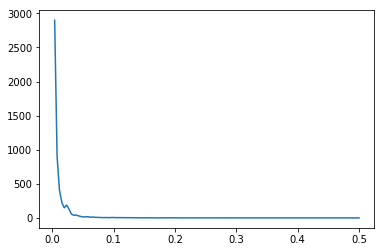

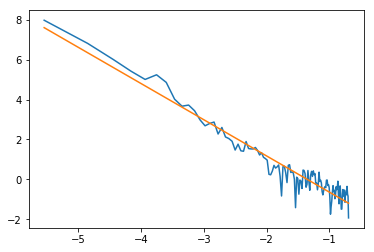

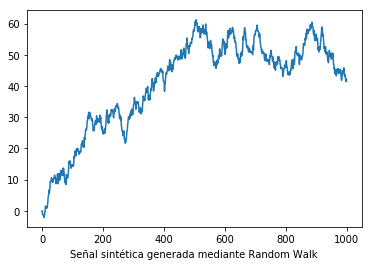

In [19]:
rw = random_walk(1000,proba = 0.5)
rw = np.array(rw)
f,pxx,w1,w0 = spectrum1f(rw-np.mean(rw),welch = True)

plt.plot(f,pxx)
plt.figure()
y_hat = w0+w1*np.log(f)
plt.plot(np.log(f),np.log(pxx))
plt.plot(np.log(f),y_hat)

plt.figure()
plt.plot(rw)
print(w1)
print(w0)
h = (np.abs(w1) - 1)/2
print(h)
plt.xlabel('Esto es la h estimada mediante 1/f')


H = hurst(rw)
print(H)
plt.xlabel('Señal sintética generada mediante Random Walk')


La relación entre exponente de Hurst y beta del espectro es, para fbm, 

$$H = \frac{\beta-1}{2}$$

## Experimentos simulaciones señales sintéticas

Señales sintéticas ...

In [20]:

h_real = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#Calculate mean vector
h_m = []

#Calculate std vector

h_std = []

#R/S method

#for h in h_real:
#    h_hat = []
#    for i in range (100):
#        rw = random_walk(1000, proba = h)
#        h_hat.append(hurst(rw))
#    h_m.append(np.mean(h_hat))
#    h_std.append(np.std(h_hat))
    
#1/f method
for h in h_real:
    h_hat = []
    for i in range (100):
        rw = random_walk(1000, proba = h)
        h_hat.append(spectrum1f(rw)[-2])
        
    spectrum_segment = np.array(h_hat)
    h_est_1f = (np.abs(spectrum_segment)-1)/2

    h_m.append(np.mean(h_est_1f))
    h_std.append(np.std(h_est_1f))


Text(0,0.5,'Valor estimado de H mediante 1/f')

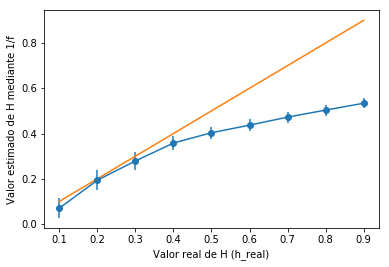

In [22]:
plt.figure()
plt.errorbar(h_real,h_m,yerr = h_std,marker = 'o')
plt.plot(h_real,h_real)
plt.xlabel('Valor real de H (h_real)')
plt.ylabel('Valor estimado de H mediante 1/f')